import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


upload the db file

In [ ]:

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#**helper functions**

In [ ]:
def calcCrossValidation_RMSE(model, df, predictors, outcome):


  # Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=df.shape[0])
  accuracy = []
  total_RMSE=0
  for train, test in kf.split(df):
      # print(train)
      # Filter training data
      train_predictors = (df[predictors].iloc[train, :])
      # The target we're using to train the algorithm.
      train_target = df[outcome].iloc[train]
      test_predictors = (df[predictors].iloc[test, :])
      # print(train_predictors)

      # The target we're using to train the algorithm.
      test_target = df[outcome].iloc[test]

      # Training the algorithm using the predictors and target.
      # print(train_target)
      model.fit(train_predictors, train_target)
      predictions = model.predict(test_predictors)
      # print(predictions)
      rmse = sqrt(mean_squared_error(test_target, predictions))  
      # print(rmse)
      total_RMSE += rmse

  return total_RMSE/df.shape[0]
  # return 0

In [ ]:
def calcCrossValidation_Matrix(model, df, predictors, outcome):

  total_tp = 0
  total_tn = 0
  total_fp = 0
  total_fn = 0

  # Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=df.shape[0])
  accuracy = []
  for train, test in kf.split(df):
      # print("1")

      # Filter training data
      train_predictors = (df[predictors].iloc[train, :])
      # The target we're using to train the algorithm.
      train_target = df[outcome].iloc[train]
      # print("1")

      test_predictors = (df[predictors].iloc[test, :])
      # The target we're using to train the algorithm.
      test_target = df[outcome].iloc[test]
      # print("1")


      # Training the algorithm using the predictors and target.
      model.fit(train_predictors, train_target)
      predictions = model.predict(test_predictors)
      # cm = confusion_matrix(test_target, predictions)
      # print(cm)
      # print("1")
      # print("test_target")
      test_target = test_target.to_numpy()
      # print(test_target)
      # np.array(df[outcome].values.tolist())
      # print(type(test_target))
      # print("predictions")
      # print(predictions)
      # print(type(predictions))

      tn, fp, fn, tp = perf_measure(test_target, predictions)
      # print("1")

      total_tp += tp
      total_tn += tn
      total_fp += fp
      total_fn += fn

  # print(total_tn, total_fp, total_fn, total_tp)
  return total_tn, total_fp, total_fn, total_tp 

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    # print(TN, FP, FN, TP)
    return(TN, FP, FN, TP)

In [ ]:
def calc_specificity(tn, fp, fn, tp):
  return tn / (tn +fp)

In [ ]:
def calc_sensitivity(tn, fp, fn, tp):
  return tp / (tp +fn)

#**ALL patients (treated + untreated) Livnat**

In [ ]:
const_seed = 42

In [ ]:
# categorical_features = ['gender','oligoclonal_band','diagnosis']

In [ ]:
# df_all_treated = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/DF_all_treated.pkl")
# df_all_treated = pd.get_dummies(df_all_treated, columns=categorical_features, drop_first=True)
# df_all_treated.drop(['treatment_when_sample_was_taken'], axis='columns', inplace=True)
# df_all_treated
# df_all_treated.to_pickle('/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/df_Livnat_all_patients.pkl')


In [ ]:
df_Livnat_all_patients = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/df_Livnat_all_patients.pkl")
df_Livnat_all_patients

In [ ]:
def min_max_normalize_features(dataframe, numeric_list):
    for num_feature in numeric_list:
        dataframe[num_feature] = (dataframe[num_feature] - dataframe[num_feature].min()) / (
                dataframe[num_feature].max() - dataframe[num_feature].min())
    return dataframe

In [ ]:
numeric_features = ['TIM3_RQ', 'TIGIT_RQ','LAG3_RQ','age_at_diagnosis','MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells']
df_Livnat_all_patients = min_max_normalize_features(df_Livnat_all_patients, numeric_features)
df_Livnat_all_patients

In [ ]:
df_Livnat_all_patients.columns

Index(['sample_code', 'TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'age_at_diagnosis',
       'primary_EDSS_at_diagnosis', '1_years_EDSS_from_sample_date',
       '5_years_from_sample', 'EDSS_post_10_years', 'MRI_lesion_mass',
       'Lymph_Cells', 'PMN_Cells', 'Cells', 'gender_M', 'oligoclonal_band_POS',
       'diagnosis_SPMS'],
      dtype='object')

all features

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)


0.8863636363636364
0.6041666666666666
1.6957720588235292


0.8863636363636364
0.5208333333333334
1.6957720588235292
Feature ranking:
1. feature 4 primary_EDSS_at_diagnosis (0.311297)
2. feature 3 age_at_diagnosis (0.163261)
3. feature 0 TIM3_RQ (0.130927)
4. feature 2 LAG3_RQ (0.095793)
5. feature 1 TIGIT_RQ (0.091260)
6. feature 5 MRI_lesion_mass (0.069530)
7. feature 8 Cells (0.040425)
8. feature 9 gender_M (0.030366)
9. feature 7 PMN_Cells (0.026389)
10. feature 6 Lymph_Cells (0.025912)
11. feature 10 oligoclonal_band_POS (0.014840)


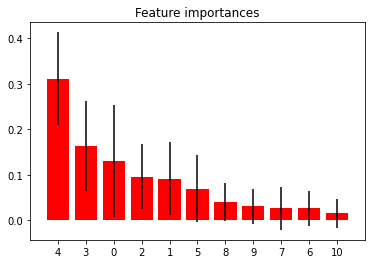

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(predictor_var1)):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], predictor_var1[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictor_var1)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(predictor_var1)), indices)
plt.xlim([-1, len(predictor_var1)])
plt.show()

** new ** NO - TIGIT, LAg3, PD-1, Cells in CSF

In [ ]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'


tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)
importances = rf.feature_importances_
importances



0.8636363636363636
0.6458333333333334
1.6957720588235292


array([0.2078667 , 0.19929823, 0.39132735, 0.16576037, 0.02571008,
       0.01003727])

In [ ]:

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


coefficients = pd.concat([pd.DataFrame(predictor_var), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)

0.8863636363636364
0.6041666666666666
                feature_name  coefficient_val
0                    TIM3_RQ         1.499312
2  primary_EDSS_at_diagnosis         1.021601
4                   gender_M         0.716591
3            MRI_lesion_mass         0.444095
1           age_at_diagnosis         0.438176
5       oligoclonal_band_POS         0.303153


** new ** top 7 combination

In [ ]:
predictor_var = ['PMN_Cells', 'TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'

In [ ]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)

tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)
importances = rf.feature_importances_
importances



0.875
0.625
1.6957720588235292


array([0.02887817, 0.19919548, 0.19892274, 0.33721771, 0.16564764,
       0.04140064, 0.02873762])

In [ ]:

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


coefficients = pd.concat([pd.DataFrame(predictor_var), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


0.8863636363636364
0.6041666666666666
                feature_name  coefficient_val
1                    TIM3_RQ         1.512744
3  primary_EDSS_at_diagnosis         1.019000
5                   gender_M         0.719280
0                  PMN_Cells         0.523106
4            MRI_lesion_mass         0.451435
2           age_at_diagnosis         0.437985
6       oligoclonal_band_POS         0.298670


no genes

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.875
0.6041666666666666
1.6480147058823533


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8181818181818182
0.6041666666666666
1.6480147058823533


no TIM3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)


0.875
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9090909090909091
0.4583333333333333
1.6957720588235292


no TIGIT_RQ

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8977272727272727
0.5416666666666666
1.6957720588235292


no LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8977272727272727
0.5625
1.6957720588235292


no TIM3 and LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)


0.875
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8522727272727273
0.5208333333333334
1.6957720588235292


no TIM3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)


0.875
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.875
0.5833333333333334
1.6957720588235292


no LAG3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


0.8863636363636364
0.6041666666666666
1.6079044117647068
                feature_name  coefficient_val
0                    TIM3_RQ         1.508446
2  primary_EDSS_at_diagnosis         1.022407
7                   gender_M         0.721636
5                  PMN_Cells         0.520142
3            MRI_lesion_mass         0.442186
1           age_at_diagnosis         0.429728
8       oligoclonal_band_POS         0.304237
4                Lymph_Cells         0.271466
6                      Cells         0.012763


In [ ]:
df_Livnat_all_patients.shape

(136, 16)

In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)
importances = rf.feature_importances_
print(importances)

0.8522727272727273
0.6666666666666666
1.6957720588235292
[0.15338166 0.20113011 0.40690177 0.12342405 0.01611953 0.01971165
 0.03936391 0.02900499 0.01096233]


no MRI

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS' 
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


0.8863636363636364
0.5833333333333334
1.6957720588235292
                feature_name  coefficient_val
0                    TIM3_RQ         1.522068
4  primary_EDSS_at_diagnosis         1.035526
8                   gender_M         0.706492
6                  PMN_Cells         0.514383
3           age_at_diagnosis         0.414302
9       oligoclonal_band_POS         0.324506
5                Lymph_Cells         0.288836
1                   TIGIT_RQ         0.192595
2                    LAG3_RQ         0.173213
7                      Cells         0.008175


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9090909090909091
0.6041666666666666
1.6957720588235292


no OCB

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5833333333333334
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8522727272727273
0.5416666666666666
1.6957720588235292


no cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5625
1.6957720588235292


no lymph cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9090909090909091
0.5416666666666666
1.6957720588235292


no PMM cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6821691176470588


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9090909090909091
0.5833333333333334
1.6957720588235292


no MRI, cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5833333333333334
1.6602941176470585


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5
1.6602941176470585


no MRI, PMM cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6439338235294112


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9090909090909091
0.5208333333333334
1.6439338235294112


no TIGIT, cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.6641544117647056


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5833333333333334
1.6957720588235292


no TIGIT, pmm cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.633639705882353


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8977272727272727
0.5833333333333334
1.633639705882353


no MRI, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.5833333333333334
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.9204545454545454
0.5833333333333334
1.6957720588235292


no MRI, TIM3, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.875
0.6041666666666666
1.7838235294117646


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8636363636363636
0.5625
1.6957720588235292


no MRI, TIM3, TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.875
0.6041666666666666
1.6957720588235292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8636363636363636
0.5416666666666666
1.6957720588235292


no MRI, TIGIT, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6041666666666666
1.484742647058824


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_Livnat_all_patients, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
randomForestRegr = RandomForestRegressor(n_estimators = 10, random_state = const_seed)
predictor_rmse = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS']
outcome_rmse = 'EDSS_post_10_years'
rmse = calcCrossValidation_RMSE(randomForestRegr, df_Livnat_all_patients, predictor_rmse, outcome_rmse)
print(rmse)

0.8863636363636364
0.6875
1.484742647058824
